In [3]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'y=1+2x+1x^2')

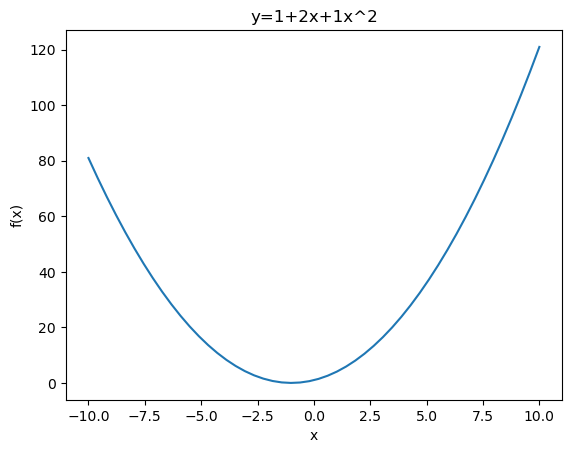

In [4]:
x_range = np.linspace(-10, 10, 50)
coeffs = [1, 2, 1]
y = [np.polyval(coeffs,i) for i in x_range]
plt.plot(x_range, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'y={coeffs[0]}+{coeffs[1]}x+{coeffs[2]}x^2')

In [5]:
%%latex
$Function: y = 1+2x+x^2 = (1+x)^2$

$Derivative: y^{'} = 2+2x = 2(1+x)$

<IPython.core.display.Latex object>

In [6]:
def grad_fx(coeffs):
    p = np.poly1d(coeffs)
    return np.polyder(p)

In [7]:
der = grad_fx(coeffs)
min_point = []
min_point.append(np.roots(der)[0])
min_point.append(np.polyval(np.poly1d(coeffs), min_point[0]))
print(f'minimum point (x,y) = {tuple(min_point)}')

minimum point (x,y) = (-1.0, 0.0)


In [8]:
def grad_update(grad,x,eta):
    return x - eta*np.polyval(grad,x)

In [9]:
def find_min_gd(grad,eta,epsilon,x,plot=False):
    x_t = x
    x_tPlusOne = None
    converged = False
    i=0
    x_hist = [x_t]
    while not converged:
        i+=1
        x_tPlusOne = grad_update(grad,x_t,eta)
        x_hist.append(x_tPlusOne)
        if np.round(np.abs(x_tPlusOne - x_t),5) < epsilon:
            converged = True
        x_t = x_tPlusOne
    if plot is True :
        return x_hist
    return x_tPlusOne,i

In [13]:
np.random.seed(555)
x_init = np.random.randint(low=-10,high=10,size=1)
gd_min_point = []
gd_min_point.append(find_min_gd(grad_fx(coeffs),eta=0.01,epsilon=0.0001,x=x_init)[0][0]) # x
gd_min_point[0] = np.round(gd_min_point[0],4)
gd_min_point.append(np.polyval(np.poly1d(coeffs), gd_min_point[0]))
gd_min_point[1] = np.round(gd_min_point[1],4)
print(f'Minimum point with GD (x,y) = {tuple(gd_min_point)} ~ {tuple(min_point)}')

Minimum point with GD (x,y) = (-0.9954, 0.0) ~ (-1.0, 0.0)


The minimum point that we got from the GD algorithm is almost the same as the
theoretical minimum of the function.
Our explanation is that the algorithm converges to a x point when the derivative
is almost zero(as in a minimum point) up to a difference of Epsilon.
The smaller the Epsilon the closer the gd_min_point will be to the theoretical minimum.

In [14]:
np.random.seed(318880754)
x_init = [np.random.randint(low=-10,high=10,size=1)[0] for _ in range(4)]
Eta = [0.1,0.01,0.001]
Epsilon = [0.001,0.0001,0.00001,0.000001]

for x0 in x_init:
    for eta in Eta:
        for epsilon in Epsilon:
            t = find_min_gd(grad_fx(coeffs),eta,epsilon,x0)[1]
            print(f'x_init={x0}, eta={eta}, epsilon={epsilon}, T={t}')


x_init=5, eta=0.1, epsilon=0.001, T=33
x_init=5, eta=0.1, epsilon=0.0001, T=44
x_init=5, eta=0.1, epsilon=1e-05, T=57
x_init=5, eta=0.1, epsilon=1e-06, T=57
x_init=5, eta=0.01, epsilon=0.001, T=239
x_init=5, eta=0.01, epsilon=0.0001, T=355
x_init=5, eta=0.01, epsilon=1e-05, T=501
x_init=5, eta=0.01, epsilon=1e-06, T=501
x_init=5, eta=0.001, epsilon=0.001, T=1245
x_init=5, eta=0.001, epsilon=0.0001, T=2418
x_init=5, eta=0.001, epsilon=1e-05, T=3889
x_init=5, eta=0.001, epsilon=1e-06, T=3889
x_init=-8, eta=0.1, epsilon=0.001, T=34
x_init=-8, eta=0.1, epsilon=0.0001, T=45
x_init=-8, eta=0.1, epsilon=1e-05, T=58
x_init=-8, eta=0.1, epsilon=1e-06, T=58
x_init=-8, eta=0.01, epsilon=0.001, T=246
x_init=-8, eta=0.01, epsilon=0.0001, T=363
x_init=-8, eta=0.01, epsilon=1e-05, T=508
x_init=-8, eta=0.01, epsilon=1e-06, T=508
x_init=-8, eta=0.001, epsilon=0.001, T=1322
x_init=-8, eta=0.001, epsilon=0.0001, T=2495
x_init=-8, eta=0.001, epsilon=1e-05, T=3966
x_init=-8, eta=0.001, epsilon=1e-06, T=396

As we can see, the smallest amount of iterations(T) is for Hyperparameters:
x_init=5
eta=0.1
epsilon=0.001
T=33

Text(0.5, 1.0, 'y=1+2x+1x^2')

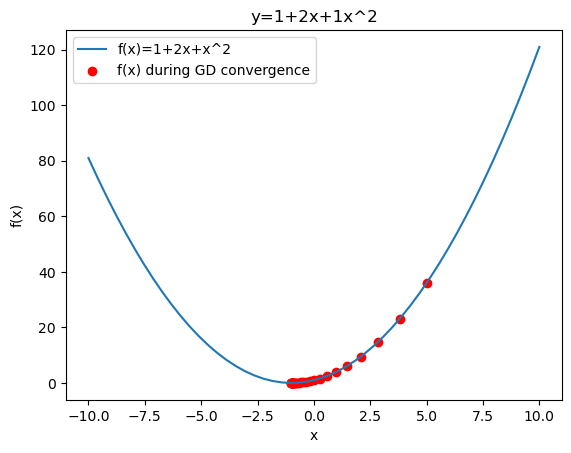

In [23]:
x0=5
eta=0.1
epsilon=0.001

x_hist = find_min_gd(grad_fx(coeffs),eta,epsilon,x0,True)
y_hist = [np.polyval(np.poly1d(coeffs), x) for x in x_hist]
plt.plot(x_range, y,label="f(x)=1+2x+x^2")
plt.scatter(x_hist,y_hist,c='r',label='f(x) during GD convergence')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'y={coeffs[0]}+{coeffs[1]}x+{coeffs[2]}x^2')